# PROYECTO 1: DEEP LEARNING.


## MODELO  RANDOM FOREST

**Integrante 1:** Ángela Patricia Ordoñez Castro....................................................**Código:** 201628709    
**Integrante 2:** Ricardo Medina Aponte.................................................................**Código:** 200520707  
**Integrante 3:** Juan Sebastián Garcés Carranza.................................................**Código:** 201628949    
**Integrante 4:** Andrea Carolina Parra López........................................................**Código:** 201727740 


## Descripción del problema seleccionado

**SPRINGLEAF** ahora conocida como  **ONEMAIN FINANCIAL** es una empresa estadounidense que ofrece servicios financieros,  enfocados principalmente en prestamos personales, cuenta con cerca de 10 millones de clientes y alrededor de 10.000 empleados.  

En octubre de 2015 SPRINGLEAF ofrece una competencia en la plataforma Kaggle con un premio de 100.000 dólares el cual esta enfocado en la mejora de una estategia de marketing en la cual se ofrecen prestamos a través de envio de correos directos a sus clientes. 

El objetivo de la competencia consiste en a partir de una gran base de datos anonimizada, se desea predecir cuales de sus clientes responderan a una oferta hecha por correo directo, debido a la extensión de la base, el reto se enfoca en depurar y seleccionar un conjunto de variables con gran importancia que permitan a través de métodos de clasificación generar las mejores predicciones.

Información del problema: (https://www.kaggle.com/c/springleaf-marketing-response)

## Selección del modelo
Luego de realizar el proceso de limpieza de la base en el **Notebook 1**  y teniendo en cuenta la naturaleza del problema (clasificación), el cual incluye un gran volumen de variables, se propone el uso de un modelo **Random Forest**.

Las razones para considerar este modelo son las siguientes:

- Tiene mejoras sustanciales con respecto al modelo Bagging.
- Es considerado uno de los algoritmos más poderosos de clasificación.
- Es eficientemente cuando se usan bases de datos grandes.
- Se puede utilizar el conjunto de variables completo.
- Permite identificar cuales son las variables importantes en la clasificación.

Luego de seleccionado el modelo se desarrolla el siguiente código.


### Importar librerías
Inicialmente se importan las librerías necesarias para correr el código

In [1]:
import pandas as pd  # importamos módulo pandas
import numpy as np # importamos módulo numpy
from sklearn.ensemble import RandomForestClassifier


Luego de la limpieza y exploración de los datos se carga la base depurada, la cual no cuenta valores perdidos ni variables correlacionadas

In [2]:
#Cargue de la base.
Data = pd.read_csv('train4.csv') 
Data.head()

,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,...,VAR_1869,VAR_1912,VAR_1918,VAR_1921,VAR_1922,VAR_1926,VAR_1929,VAR_1932,VAR_1934,target
0,0,2,H,224,0,4300,C,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,999999998,9998,IAPS,0
1,1,4,H,7,53,4448,B,1.0,0.0,1.0,...,999999998,6546,9996,98,999999998,98,999999998,9998,IAPS,0
2,2,5,H,116,3,3464,C,0.0,0.0,0.0,...,999999998,999999997,9996,98,999999998,98,999999998,9998,IAPS,0
3,3,7,H,240,300,3200,C,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,999999998,9998,RCC,0
4,4,8,R,72,261,2000,N,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,999999998,9998,BRANCH,1


In [3]:
Data.shape

(144277, 435)

La base inicial cuenta con 144.277 registros y 435 variables, ahora se realiza una tabla de salida de la variable target para observar desbalanceos en ella

In [4]:
#Revisión de casos positivos y negativos para observar desbalanceo
Data['target'].value_counts()

0    110728
1     33549
Name: target, dtype: int64

Al observar el resultado anterior se evidencia un desbalanceo, puesto que, tan solo el 23% de los clientes responden a una oferta por correo directo. 

El siguiente código permite generar dos vectores uno con la variable a predecir y otro con el conjunto de variables predictoras.

In [108]:
y = Data['target']
X = Data.drop(['target'], axis=1)
X.head()

,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,...,VAR_1868,VAR_1869,VAR_1912,VAR_1918,VAR_1921,VAR_1922,VAR_1926,VAR_1929,VAR_1932,VAR_1934
0,0,2,H,224,0,4300,C,0.0,0.0,0.0,...,998,999999998,999999998,9998,98,999999998,98,999999998,9998,IAPS
1,1,4,H,7,53,4448,B,1.0,0.0,1.0,...,998,999999998,6546,9996,98,999999998,98,999999998,9998,IAPS
2,2,5,H,116,3,3464,C,0.0,0.0,0.0,...,998,999999998,999999997,9996,98,999999998,98,999999998,9998,IAPS
3,3,7,H,240,300,3200,C,0.0,0.0,0.0,...,998,999999998,999999998,9998,98,999999998,98,999999998,9998,RCC
4,4,8,R,72,261,2000,N,0.0,0.0,0.0,...,998,999999998,999999998,9998,98,999999998,98,999999998,9998,BRANCH


En la base anterior se observan variables categóricas las cuales se convertiran en dummies.

In [109]:
#Base de datos con variables categóricas existentes.
X.dtypes
obj_X = X.select_dtypes(include=['object']).copy()
obj_X.head()


,VAR_0001,VAR_0005,VAR_0237,VAR_0283,VAR_0305,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_1934
0,H,C,FL,S,S,S,CF,O,U,O,IAPS
1,H,B,CA,S,S,H,EC,O,R,R,IAPS
2,H,C,WV,S,P,R,UU,R,R,U,IAPS
3,H,C,TX,S,P,H,FF,R,R,U,RCC
4,R,N,IL,S,P,S,FF,R,U,O,BRANCH


In [110]:
#Convertir a dummies las variables categóricas
x3=pd.get_dummies(obj_X)
x3.head()

,VAR_0001_H,VAR_0001_Q,VAR_0001_R,VAR_0005_B,VAR_0005_C,VAR_0005_N,VAR_0005_S,VAR_0237_AK,VAR_0237_AL,VAR_0237_AR,...,VAR_0353_R,VAR_0353_U,VAR_0354_O,VAR_0354_R,VAR_0354_U,VAR_1934_BRANCH,VAR_1934_CSC,VAR_1934_IAPS,VAR_1934_MOBILE,VAR_1934_RCC
0,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [111]:
#Base de datos con variables numéricas solamente.
X2 = X.select_dtypes(exclude=['object']).copy()
X2.head()


,Unnamed: 0,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0015,VAR_0016,VAR_0017,...,VAR_1867,VAR_1868,VAR_1869,VAR_1912,VAR_1918,VAR_1921,VAR_1922,VAR_1926,VAR_1929,VAR_1932
0,0,2,224,0,4300,0.0,0.0,0.0,1.0,0.0,...,98,998,999999998,999999998,9998,98,999999998,98,999999998,9998
1,1,4,7,53,4448,1.0,0.0,1.0,2.0,1.0,...,98,998,999999998,6546,9996,98,999999998,98,999999998,9998
2,2,5,116,3,3464,0.0,0.0,0.0,1.0,0.0,...,98,998,999999998,999999997,9996,98,999999998,98,999999998,9998
3,3,7,240,300,3200,0.0,0.0,0.0,2.0,0.0,...,98,998,999999998,999999998,9998,98,999999998,98,999999998,9998
4,4,8,72,261,2000,0.0,0.0,0.0,1.0,0.0,...,98,998,999999998,999999998,9998,98,999999998,98,999999998,9998


In [112]:
#Nuevo conjunto predictor  concatenando las bases anteriores
X = pd.concat([x3, X2], axis=1)
X.fillna(0, inplace=True)
X.isnull().sum().sort_values(ascending=False).head(10)


VAR_1932    0
VAR_0258    0
VAR_0279    0
VAR_0267    0
VAR_0266    0
VAR_0262    0
VAR_0261    0
VAR_0260    0
VAR_0257    0
VAR_0225    0
dtype: int64

## Calibración de los parámetros

El primer parámetro que se calibra es el numero de árboles que se generarán para predecir, para ello:
- Se crea un vector de 30 valores los cuales iteran de 10 en 10, 
- Se corre un modelo de random forest para cada iteración.
- Se tiene en cuenta como medida de calibración el F1-score el cual es la medida apropiada teniendo en cuenta el desbalanceo de las clases.
- Para la medición del F1-score se realiza metodo de cross validation con 5 folds promediando los valores obtenidos con este método.

In [11]:
#Lista de valores para probar n estimadores
#Los estimadores determinan el número de arboles que se deben crear
from sklearn.model_selection import cross_val_score
estimator_range = range(10, 310, 10)


# Con este comando se pretende obtener las medias de los f1-scores de los n estimadores
F1_scores = []

for estimator in estimator_range:
    rfcla = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    f1_scores = cross_val_score(rfcla, X, y, cv=5, scoring='f1')
    F1_scores.append(np.mean(f1_scores))


Luego de realizar las treinta iteraciones se obtienen los siguientes resultados

In [20]:
F1_scores

[0.27286256962494615,
 0.28019251762242253,
 0.27858901619799686,
 0.27888927042592176,
 0.2766325192640414,
 0.2778087674789369,
 0.2763818613979362,
 0.2762720800133848,
 0.2766332852425256,
 0.27645922476078094,
 0.2761447605251247,
 0.2746521025533798,
 0.27597249503047266,
 0.2782380916022138,
 0.27839142849502724,
 0.2777062293354546,
 0.27728727692469846,
 0.2778422666736196,
 0.2776036934415105,
 0.27806016818800394,
 0.27859264710545095,
 0.27919348909037217,
 0.2802760227966647,
 0.2804738835038291,
 0.2797957431440524,
 0.27933996232766534,
 0.27875011710902503,
 0.27814785622591426,
 0.27929098526045554,
 0.27907272593724053]

Text(0,0.5,'F1(Alto es mejor)')

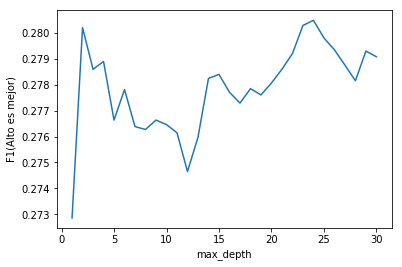

In [16]:
# Graficando los n estimadores versus el F1 score
import matplotlib.pyplot as plt
max_depth_range = range(1, 31,1)
plt.plot(max_depth_range, F1_scores)
plt.xlabel('max_depth')
plt.ylabel('F1(Alto es mejor)')

In [17]:
max(F1_scores)

0.2804738835038291

El máximo F1-score obtenido es 0.2805, este valor se presenta en la iteración 24 luego **el número de árboles óptimo es 241**

In [34]:
#Vector con nombre de las variables 
feature_cols = X.columns[X.columns.str.startswith('C') == False]
feature_cols

Index(['VAR_0001_H', 'VAR_0001_Q', 'VAR_0001_R', 'VAR_0005_B', 'VAR_0005_C',
       'VAR_0005_N', 'VAR_0005_S', 'VAR_0237_AK', 'VAR_0237_AL', 'VAR_0237_AR',
       ...
       'VAR_1867', 'VAR_1868', 'VAR_1869', 'VAR_1912', 'VAR_1918', 'VAR_1921',
       'VAR_1922', 'VAR_1926', 'VAR_1929', 'VAR_1932'],
      dtype='object', length=559)

El segundo parámetro que se calibra es el número de variables que se utilizarán para predecir, para ello:
- Se crea un vector de 81 valores los cuales iteran de 1 en 1, 
- Se corre un modelo de random forest para cada iteración con 240 árboles.
- Se tiene en cuenta como medida de calibración el F1-score el cual es la medida apropiada teniendo en cuenta el desbalanceo de las clases.
- Para la medición del F1-score se realiza metodo de cross validation con 5 folds promediando los valores obtenidos con este método.

In [35]:
# Lista con el máximo de variables
feature_range = range(1, 81)

In [26]:
# Con este comando se pretende obtener las medias de los f1-scores de las n variables
F1_scores2 = []

# Este comando permite calibrar las variables usadas
for feature in feature_range:
    rfcla = RandomForestClassifier(n_estimators=241, max_features=feature, random_state=1, n_jobs=-1)
    f1_scores2 = cross_val_score(rfcla, X, y, cv=5, scoring='f1')
    F1_scores2.append(np.mean(f1_scores2))
F1_scores2

[0.09442143292711554,
 0.13311861771199468,
 0.16266415085279365,
 0.1867833021658951,
 0.20208620539492697,
 0.21637074011591997,
 0.22465253599554194,
 0.2325603754141985,
 0.2374914285843806,
 0.24570721294796663,
 0.25194178818313934,
 0.25431478483557246,
 0.256529210704899,
 0.25978062916216965,
 0.2609482522516491,
 0.2666751889512379,
 0.2670112833410937,
 0.27153260791173556,
 0.26804345063313606,
 0.27347373098842126,
 0.27790078958750863,
 0.27883126599133684,
 0.2804738835038291,
 0.2800968817803547,
 0.28216847097628295,
 0.2825460368073801,
 0.2834092008842855,
 0.284451727210307,
 0.28486615631084683,
 0.2871516364117606,
 0.28963389416405894,
 0.29061661646566395,
 0.2882064421745967,
 0.2875103931962987,
 0.2922759743600772,
 0.2901040750280847,
 0.2944151823595823,
 0.29292343197751947,
 0.2928262312200041,
 0.29550499165850563,
 0.2960588812173438,
 0.2995455656639209,
 0.2930170353217652,
 0.2946123974006372,
 0.29646601812392687,
 0.2966627707986519,
 0.29758530407

In [23]:
len(F1_scores2)

81

Text(0,0.5,'F1(Alto es mejor)')

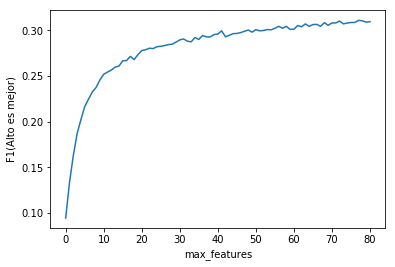

In [24]:
# Gráfica del numero de variables vs F1 score
plt.plot(range(81), F1_scores2)
plt.xlabel('max_features')
plt.ylabel('F1(Alto es mejor)')

In [44]:
sorted(zip(F1_scores2, feature_range))[79]

(0.31104247544327607, 78)

El máximo F1-score obtenido es 0.3110, este valor  presenta en la iteración 78 luego **el número de variables óptimo es 78**

## Resolviendo un random forest con los mejores parámetros 

n-estimado=240, Variables =78 y profundidad del arbol= 3.

In [132]:
# modelo con los parámetros calibrados
rfcla = RandomForestClassifier(n_estimators=241, max_features=78, max_depth=3, oob_score=True, random_state=1)
rfcla.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=78, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

## Importancia de las variables

Luego de calcular el modelo con los valores óptimos se estima la importancia de las variables.

In [69]:
# Calculando las importancias de las variables
pd.DataFrame({'feature':feature_cols, 'importance':rfcla.feature_importances_}).sort_values('importance', ascending=False).head(80)

,feature,importance
159,VAR_0070,0.105244
143,VAR_0015,0.098455
142,VAR_0007,0.083798
141,VAR_0006,0.081487
381,VAR_0795,0.068484
158,VAR_0067,0.061345
145,VAR_0017,0.052480
156,VAR_0060,0.042172
281,VAR_0505,0.035406
157,VAR_0066,0.028769


In [70]:
# calcular el  out-of-bag R-squared score
rfcla.oob_score_

0.7700603699827415

## Selección de variables importantes

Con los siguientes procesos se pretende acotar el conjunto de entrenamiento a un valor más pequeño de variables, por ello se evaluan diferentes threshold para seleccionar un número apropiado de variables.

In [71]:
# Selección de variables importantes con diferentes threshold
from sklearn.feature_selection import SelectFromModel
print(SelectFromModel(rfcla, threshold=0.01, prefit=True).transform(X).shape)
print(SelectFromModel(rfcla, threshold='mean', prefit=True).transform(X).shape)
print(SelectFromModel(rfcla, threshold='median', prefit=True).transform(X).shape)

(144277, 22)
(144277, 45)
(144277, 559)


Nótese que tan solo 22 variables cuentan con  una importancia superior al 1%, con un threshold equivalente a la media, 45 variables quedan importantes.

In [73]:
# create a new feature matrix that only includes important features
X_important = SelectFromModel(rfcla, threshold='mean', prefit=True).transform(X)
X_important

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 9.996e+03, 9.996e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 9.996e+03, 9.996e+03,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.400e+01, 2.400e+01,
        0.000e+00],
       ...,
       [3.000e+00, 1.000e+00, 5.000e+00, ..., 5.400e+01, 1.600e+01,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 2.000e+00, 2.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        3.306e+03]])

In [74]:
# Se estima un modelo incluyendo solo las variables importantes
rfcla1 = RandomForestClassifier(n_estimators=240, max_features=45, max_depth=3, random_state=1)
scores = cross_val_score(rfcla1, X_important, y, cv=10, scoring='f1')
np.mean(scores)

0.15180957407722245

In [131]:
rfcla1.fit(X_important,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=45, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=240, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

El modelo obtenido cuenta con un score mucho menor al obtenido en el modelo con 78 variables luego se sigue trabajando con el primer modelo obtenido

In [76]:
scores2 = cross_val_score(rfcla1, X_important, y, cv=5)
np.mean(scores2)

0.772118915933353

# Evaluación del modelo en la base test

Para evaluar el modelo en la base test es necesario que esta cuente con la misma estructura de la base Train por ello se convienten a dummies las variables categóricas.

In [113]:
test = pd.read_csv('test2.csv') 
test.head()
Xt=test
#Ajuste de variables categóricas a Dummies
X.dtypes
obj_X = Xt.select_dtypes(include=['object']).copy()
obj_X.head()
obj_X
#Los valores NaN se remplaza por la palabra vacio
obj_X.fillna('Vacios', inplace=True)
x3=pd.get_dummies(obj_X)
x3.head()
#Ajuste de las variables numéricas, los missing se convierten en cero
X2 = Xt.select_dtypes(exclude=['object']).copy()
X2.head()
#Nuevo conjunto predictor  concatenando las bases anteriores
Xt = pd.concat([x3, X2], axis=1)
Xt.fillna(0, inplace=True)
Xt.isnull().sum().sort_values(ascending=False)

test = pd.concat([x3, X2], axis=1)
test.head()

,VAR_0001_H,VAR_0001_Q,VAR_0001_R,VAR_0005_B,VAR_0005_C,VAR_0005_N,VAR_0005_S,VAR_0237_AK,VAR_0237_AL,VAR_0237_AR,...,VAR_1867,VAR_1868,VAR_1869,VAR_1912,VAR_1918,VAR_1921,VAR_1922,VAR_1926,VAR_1929,VAR_1932
0,0,0,1,1,0,0,0,0,0,0,...,98,998,999999998,6121,47,98,999999998,98,999999998,9998
1,0,0,1,0,1,0,0,0,0,0,...,0,0,999999997,999999998,9998,98,999999998,98,999999998,9998
2,0,0,1,0,1,0,0,0,0,0,...,98,998,999999998,999999998,9998,98,999999998,98,999999998,9998
3,0,0,1,1,0,0,0,0,0,0,...,98,998,999999998,999999996,9996,1,1140,98,999999998,9998
4,1,0,0,0,1,0,0,0,0,0,...,98,998,999999998,999999998,9998,98,999999998,98,999999998,9998


Para asegurar que la base cuente con las mismas variables, se filtra la base con las variables del X_Train

In [136]:
#Vector con nombre de las variables 
feature_cols = X.columns[X.columns.str.startswith('C') == False]
feature_cols


Index(['VAR_0001_H', 'VAR_0001_Q', 'VAR_0001_R', 'VAR_0005_B', 'VAR_0005_C',
       'VAR_0005_N', 'VAR_0005_S', 'VAR_0237_AK', 'VAR_0237_AL', 'VAR_0237_AR',
       ...
       'VAR_1867', 'VAR_1868', 'VAR_1869', 'VAR_1912', 'VAR_1918', 'VAR_1921',
       'VAR_1922', 'VAR_1926', 'VAR_1929', 'VAR_1932'],
      dtype='object', length=559)

In [134]:
test['VAR_0237_CT']=0

In [143]:
test=test[feature_cols]

Ahora se realiza la predicción con la base test obteniendo los siguientes resultados:

In [138]:
# Vamos a usar el conjunto de prueba para obtener
# predicciones a partir de test
predicted = rfcla.predict(test)

In [139]:
test['predicted']=predicted

In [140]:
#Revisión de casos positivos y negativos de la predicción
test['predicted'].value_counts(normalize=True)

0    0.990794
1    0.009206
Name: predicted, dtype: float64

In [141]:
#Revisión de casos positivos y negativos de la predicción
test['predicted'].value_counts()

0    143895
1      1337
Name: predicted, dtype: int64

De acuerdo al modelo estimado y la información anteriormente descrita se observa que de la base test el 1% de los clientes aceptarían la oferta

In [155]:
# Vamos a usar el conjunto de prueba para obtener
# predicciones a partir de test
predpro = rfcla.predict_proba(test)

Los siguientes códigos generan el resultado que se subirá a Kaggle como test2  

In [169]:
test['target']=predpro[:,1]

In [172]:
test['target'].to_csv('test.csv',sep=',')

Los resultados obtenidos son los siguientes 


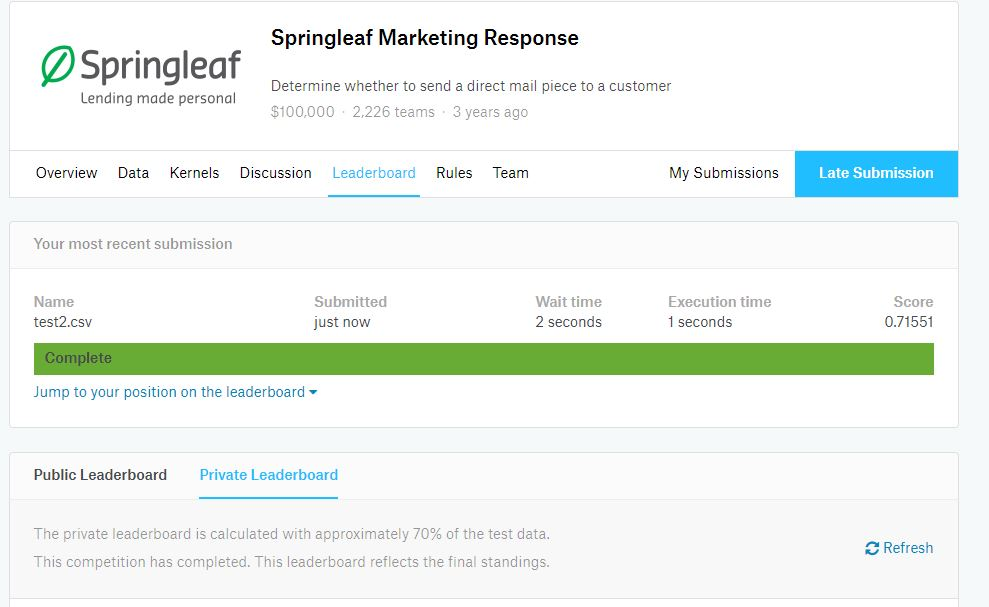

In [184]:

from IPython.display import Image
Image("result 1.JPG")

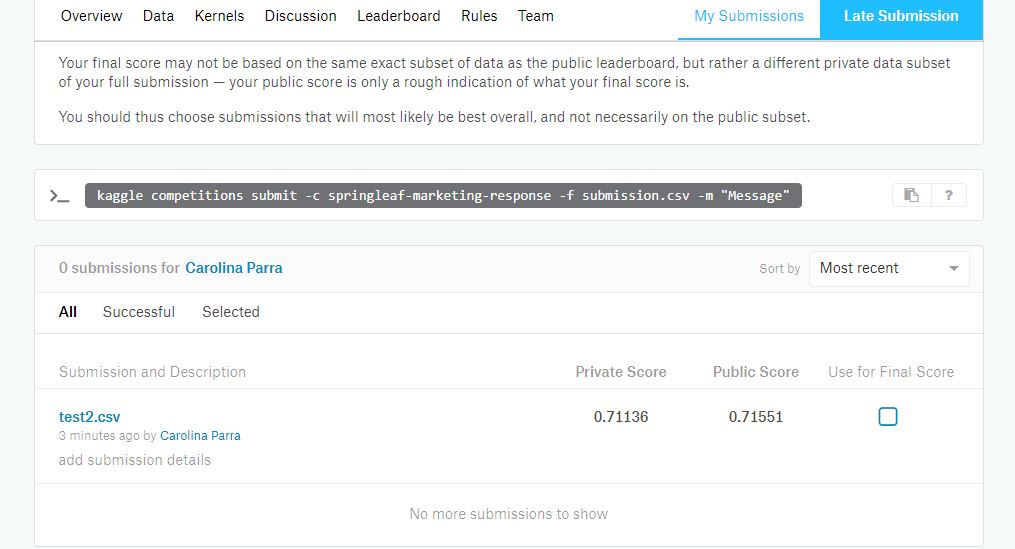

In [185]:

from IPython.display import Image
Image("result 2.JPG")